In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import re

data = pd.read_json("orderedTwitterArchive.json")
data['created_at'] = pd.to_datetime(data.created_at, format="%Y-%m-%d %H:%M:%S")
data.sort_values(by=['created_at'], inplace=True, ascending=True)
data.reset_index(inplace=True,drop=True)

data['month'] = [d.month for d in data['created_at']]
data["year"] = [d.year for d in data["created_at"]]
data["hour"] = [d.hour for d in data["created_at"]]
data["week_year"] = [d.weekofyear for d in data["created_at"]]
data["date"] = [d.date() for d in data["created_at"]]

data.drop(["created_at","id_str","source"],inplace=True,axis=1)
#lowercase everything
data['modded_text'] = data['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [2]:
#rimuovi i tag meno frequenti
tags = {}
for idx,row in data.iterrows():
    l = re.findall(r'(?<!\w)(@\w{1,15})\b',row["modded_text"])
    for tag in l:
        if tag in tags:
            tags[tag] = tags[tag] + 1
        else:
            tags[tag] = 1
print("total unique",len(tags))

common = []
uncommon = []
for el in tags:
    if tags[el] >= 10:
        common.append(el)
    if tags[el] < 10:
        uncommon.append(el)
print("unique uncommon", len(uncommon))
print("unique common",len(common))

t = []
for idx,row in data.iterrows():
    l = re.findall(r'(?<!\w)(@\w{1,15})\b',row["modded_text"])
    g = row["modded_text"]
    for el in row["modded_text"].split():
        if el in uncommon:
            g = row["modded_text"].replace(el," ")
    t.append(g)
data["modded1"] = t

total unique 14024
unique uncommon 13705
unique common 319


<function matplotlib.pyplot.show(*args, **kw)>

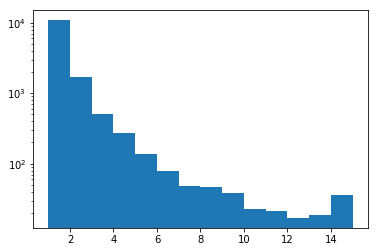

In [3]:
sortedList = list(tags.values())
sortedList.sort(reverse =True)

plt.hist(sortedList,bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],log=True)
plt.show

In [4]:
#check correctly removed stuff
tags1 = {}
for idx,row in data.iterrows():
    l = re.findall(r'(?<!\w)(@\w{1,15})\b',row["modded1"])
    for tag in l:
        if tag in tags1:
            tags1[tag] = tags1[tag] + 1
        else:
            tags1[tag] = 1
print(len(tags1))

10996


In [5]:
data

,favorite_count,in_reply_to_user_id_str,is_retweet,retweet_count,text,month,year,hour,week_year,date,modded_text,modded1
0,202,NaN,False,253,Be sure to tune in and watch Donald Trump on L...,5,2009,18,19,2009-05-04,be sure to tune in and watch donald trump on l...,be sure to tune in and watch donald trump on l...
1,3,NaN,False,2,Donald Trump will be appearing on The View tom...,5,2009,1,19,2009-05-05,donald trump will be appearing on the view tom...,donald trump will be appearing on the view tom...
2,2,NaN,False,3,Donald Trump reads Top Ten Financial Tips on L...,5,2009,13,19,2009-05-08,donald trump reads top ten financial tips on l...,donald trump reads top ten financial tips on l...
3,27,NaN,False,8,New Blog Post: Celebrity Apprentice Finale and...,5,2009,20,19,2009-05-08,new blog post: celebrity apprentice finale and...,new blog post: celebrity apprentice finale and...
4,1950,NaN,False,1421,"""My persona will never be that of a wallflower...",5,2009,14,20,2009-05-12,"""my persona will never be that of a wallflower...","""my persona will never be that of a wallflower..."
5,13,NaN,False,10,"Miss USA Tara Conner will not be fired - ""I've...",5,2009,19,20,2009-05-12,"miss usa tara conner will not be fired - ""i've...","miss usa tara conner will not be fired - ""i've..."
6,10,NaN,False,11,Listen to an interview with Donald Trump discu...,5,2009,17,20,2009-05-13,listen to an interview with donald trump discu...,listen to an interview with donald trump discu...
7,6,NaN,False,3,"""Strive for wholeness and keep your sense of w...",5,2009,16,20,2009-05-14,"""strive for wholeness and keep your sense of w...","""strive for wholeness and keep your sense of w..."
8,2,NaN,False,1,"Enter the ""Think Like A Champion"" signed book ...",5,2009,14,20,2009-05-15,"enter the ""think like a champion"" signed book ...","enter the ""think like a champion"" signed book ..."
9,5,NaN,False,3,"""When the achiever achieves, it's not a platea...",5,2009,22,20,2009-05-16,"""when the achiever achieves, it's not a platea...","""when the achiever achieves, it's not a platea..."


In [6]:
#check hashtags
hashtags = {}
for idx,row in data.iterrows():
    l = re.findall("#\S+",row["modded1"])
    for tag in l:
        if tag in hashtags:
            hashtags[tag] = hashtags[tag] + 1
        else:
            hashtags[tag] = 1
print("total unique",len(hashtags))

comHashtags = []
uncomHashtags = []
for el in hashtags:
    if hashtags[el] >= 10:
        comHashtags.append(el)
    if hashtags[el] < 10:
        uncomHashtags.append(el)
print("unique uncommon", len(uncomHashtags))
print("unique common",len(comHashtags))


t = []
for idx,row in data.iterrows():
    l = re.findall("#\S+",row["modded1"])
    g = row["modded1"]
    for el in row["modded1"].split():
        if el in uncomHashtags:
            g = row["modded1"].replace(el," ")
    t.append(g)
data["modded1"] = t

total unique 2514
unique uncommon 2429
unique common 85


In [7]:
#check correctly removed stuff
hashtags1 = {}
for idx,row in data.iterrows():
    l = re.findall("#\S+",row["modded1"])
    for tag in l:
        if tag in hashtags1:
            hashtags1[tag] = hashtags1[tag] + 1
        else:
            hashtags1[tag] = 1
print(len(hashtags1))

636


<function matplotlib.pyplot.show(*args, **kw)>

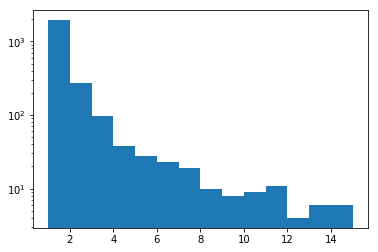

In [8]:
sortedList = list(hashtags.values())
sortedList.sort(reverse =True)

plt.hist(sortedList,bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],log=True)
plt.show

In [9]:
#esistono caratteri asiatici, rimuovo
data['modded1'] = data["modded1"].str.replace("[^\x00-\x7F]",' ')

In [10]:
#remove punctuation
data['modded1'] = data["modded1"].str.replace("[^\w\s]",'')

In [11]:
#remove links
data["modded1"] = data["modded1"].str.replace("http\S+"," ")

#remove stopwords
import nltk
from nltk.corpus import stopwords

stop = stopwords.words('english')

data['modded1'] = data['modded1'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
#there are empty rows
data = data[data["modded1"] != " "]
data.head()

,favorite_count,in_reply_to_user_id_str,is_retweet,retweet_count,text,month,year,hour,week_year,date,modded_text,modded1
0,202,NaN,False,253,Be sure to tune in and watch Donald Trump on L...,5,2009,18,19,2009-05-04,be sure to tune in and watch donald trump on l...,sure tune watch donald trump late night david ...
1,3,NaN,False,2,Donald Trump will be appearing on The View tom...,5,2009,1,19,2009-05-05,donald trump will be appearing on the view tom...,donald trump appearing view tomorrow morning d...
2,2,NaN,False,3,Donald Trump reads Top Ten Financial Tips on L...,5,2009,13,19,2009-05-08,donald trump reads top ten financial tips on l...,donald trump reads top ten financial tips late...
3,27,NaN,False,8,New Blog Post: Celebrity Apprentice Finale and...,5,2009,20,19,2009-05-08,new blog post: celebrity apprentice finale and...,new blog post celebrity apprentice finale less...
4,1950,NaN,False,1421,"""My persona will never be that of a wallflower...",5,2009,14,20,2009-05-12,"""my persona will never be that of a wallflower...",persona never wallflower rather build walls cl...


In [12]:
#stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stemmedTweets = []

for idx, row in data.iterrows():
    test = row["modded1"].split()
    desc = ""
    for el in test:
        desc = desc + " " + stemmer.stem(el) + " "
    stemmedTweets.append(desc)
temp = pd.Series(stemmedTweets)
data["modded1_stemmed"] = temp


In [13]:
data["modded1_stemmed"]

0         sure  tune  watch  donald  trump  late  night...
1         donald  trump  appear  view  tomorrow  morn  ...
2         donald  trump  read  top  ten  financi  tip  ...
3         new  blog  post  celebr  apprentic  final  le...
4         persona  never  wallflow  rather  build  wall...
5         miss  usa  tara  conner  fire  ive  alway  be...
6         listen  interview  donald  trump  discuss  ne...
7         strive  whole  keep  sens  wonder  intact  do...
8         enter  think  like  champion  sign  book  key...
9         achiev  achiev  plateau  begin  donald  j  tr...
10        afraid  uniqu  like  afraid  best  self  dona...
11        win  live  champion  view  moment  donald  j ...
12        daysw  could  use  littl  power  trump  think...
13        alway  know  could  precipic  someth  great  ...
14        read  great  interview  donald  trump  appear...
15        keep  fast  short  direct  whatev  donald  j ...
16        dont  forget  enter  think  like  champion  s.

28996


<function matplotlib.pyplot.show(*args, **kw)>

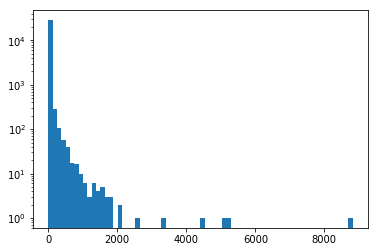

In [14]:
stemmed_words = pd.Series(' '.join(data['modded1_stemmed']).split()).value_counts()
print(len(stemmed_words))
plt.hist(stemmed_words.values,bins=70,log=True)
plt.show

6319


<function matplotlib.pyplot.show(*args, **kw)>

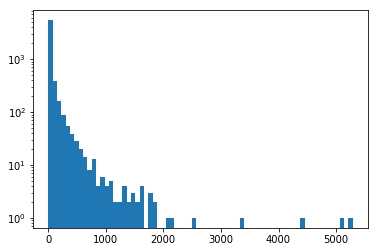

In [15]:
stemmed_words = stemmed_words[stemmed_words > 3]
stemmed_words = stemmed_words[stemmed_words < 7000]
print(len(stemmed_words))
plt.hist(stemmed_words.values,bins=70,log=True)
plt.show

In [16]:
stemmed_words

great              5285
trump              5065
thank              4454
amp                3388
presid             2544
get                2120
peopl              2099
make               1851
us                 1844
go                 1796
donald             1761
countri            1744
america            1647
time               1636
obama              1608
would              1589
new                1561
like               1515
need               1487
run                1460
job                1439
vote               1403
one                1376
rt                 1358
good               1356
love               1317
look               1316
big                1278
want               1224
work               1196
                   ... 
jamaica               4
dire                  4
bang                  4
strzokpag             4
hoganseaisle129       4
2007                  4
jaw                   4
peek                  4
usher                 4
sovereign             4
spanish         

In [22]:
c = 0
l = 0
for idx,row in data.iterrows():
    l = l + len(row["text"].split())
    c = c + len(row["modded1_stemmed"].split())
print("original text",l)
print("modded and stemmed",c)

original text 682568
modded and stemmed 395311
